In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import re
from wordcloud import WordCloud
from collections import Counter

In [18]:
df=pd.read_csv('./data/spam.csv',encoding='ISO-8859-1')

In [19]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df.shape

(5572, 5)

### The dataset has 5 columns and 5572 rows.

## Data Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### We can see that the dataset has actually 5 columns but except the first two columns the other columns has a high number of missing values.For example the first column have 5572 non null observations,second column has 5572 non null observations but the third column has only 50,fourth has 12 and the fifth column has only 6 non null observations.

In [22]:
#droppong the columns with missing values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

### As the last three columns had huge number of missing values we have  dropped them.

In [23]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [24]:
df.shape

(5572, 2)

In [25]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [27]:
#checking the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

### The first column named as 'target' don't have any missing values,the second column named as text also don't have any missing values.

In [28]:
#checking for duplicate values
df.duplicated().sum()

403

### The dataset has 403 duplicated values

In [29]:
#removing duplicate values
df=df.drop_duplicates(keep='first')

In [30]:
df.shape

(5169, 2)

### After removing the duplicate values we have 5169 rows and 2 columns.

# Explaratory Data Analysis

In [31]:
#Filtering ham and spam sms
ham=df[df['target']=='ham']
spam=df[df['target']=='spam']

In [32]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

### In the dataset we have 4516 ham sms and 653 spam sms.

In [33]:
#labelling 0 as ham and 1 as spam
encoder=LabelEncoder()
encoder.fit_transform(df['target'])
df['target']=encoder.fit_transform(df['target'])

In [34]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


([<matplotlib.patches.Wedge at 0x22599ded5d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.4%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.6%')])

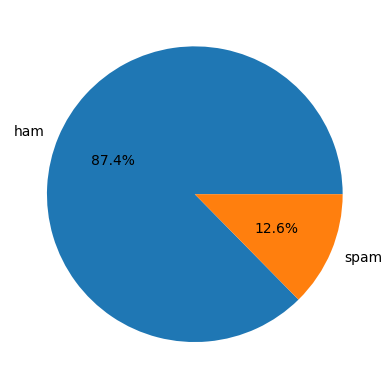

In [35]:
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct='%1.1f%%')

In [36]:


# Download the 'punkt' package
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [37]:
#Finding out the no of characters in the sms
df['num_characters']=df['text'].apply(len)

In [38]:
#Finding out the no of words in the sms
df['num_words']=df['text'].apply(lambda x:nltk.word_tokenize(x)).apply(len)

In [39]:
#Finding out the number of sentences in the sms
df['num_sentences']=df['text'].apply(lambda x:nltk.sent_tokenize(x)).apply(len)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
#summary of ham sms
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#summary of spam sms
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

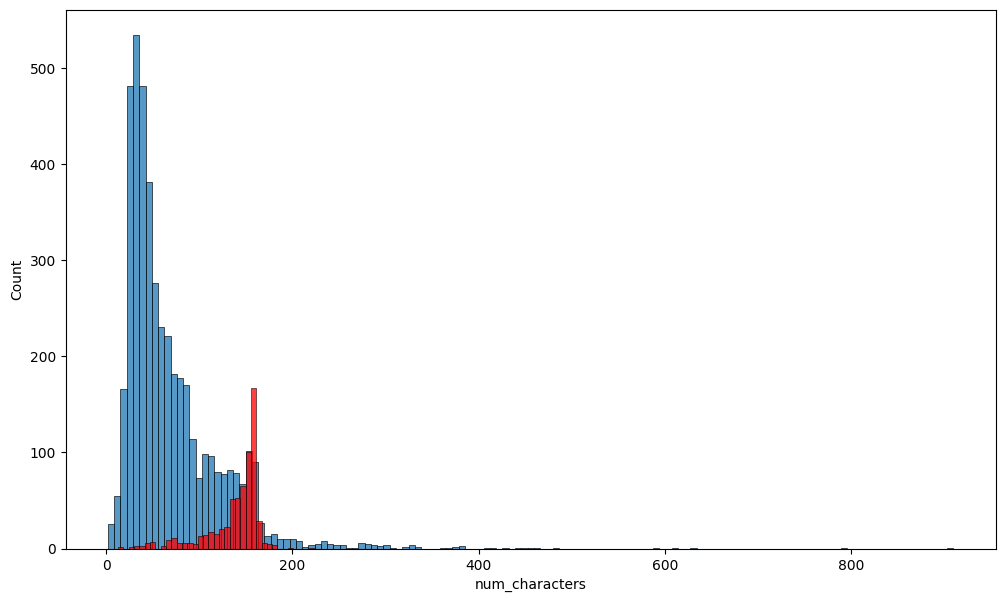

In [43]:
#plotting histogram of no of characters of spam and ham messages
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

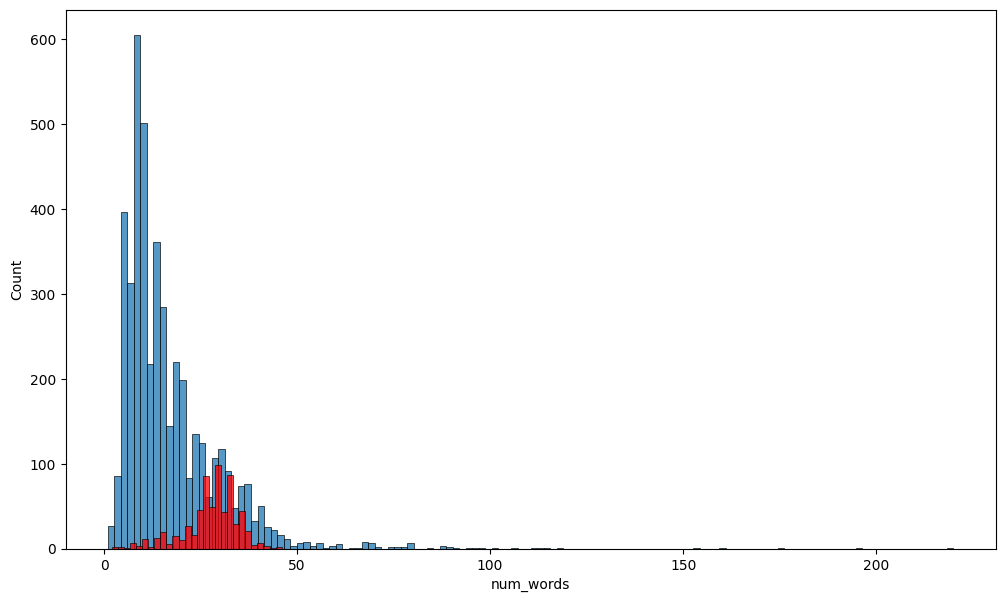

In [44]:
#plotting histogram of no of words of spam and ham messages
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

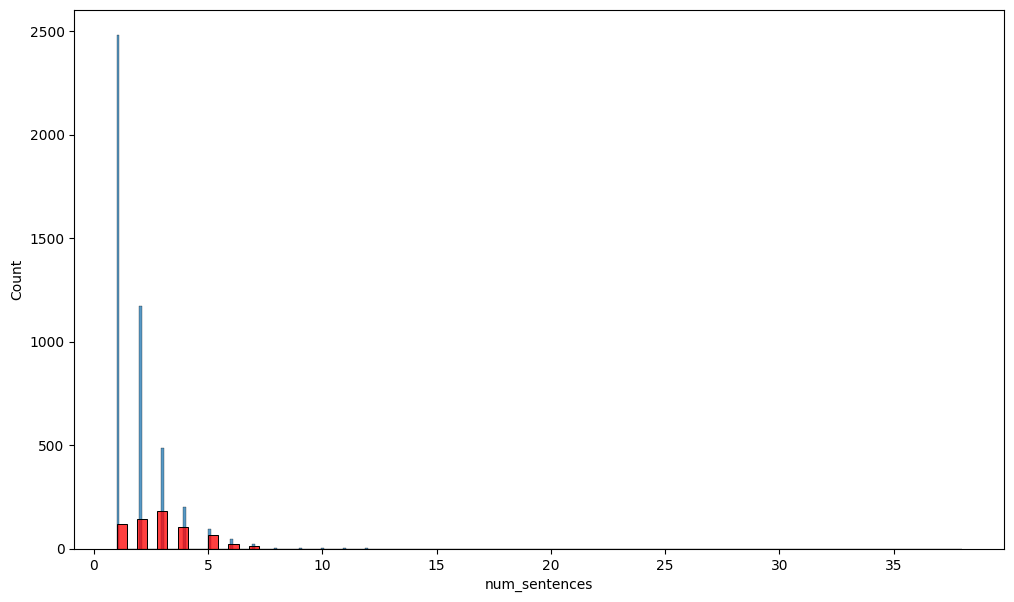

In [45]:
#plotting histogram of no of sentences of spam and ham messages
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color="red")

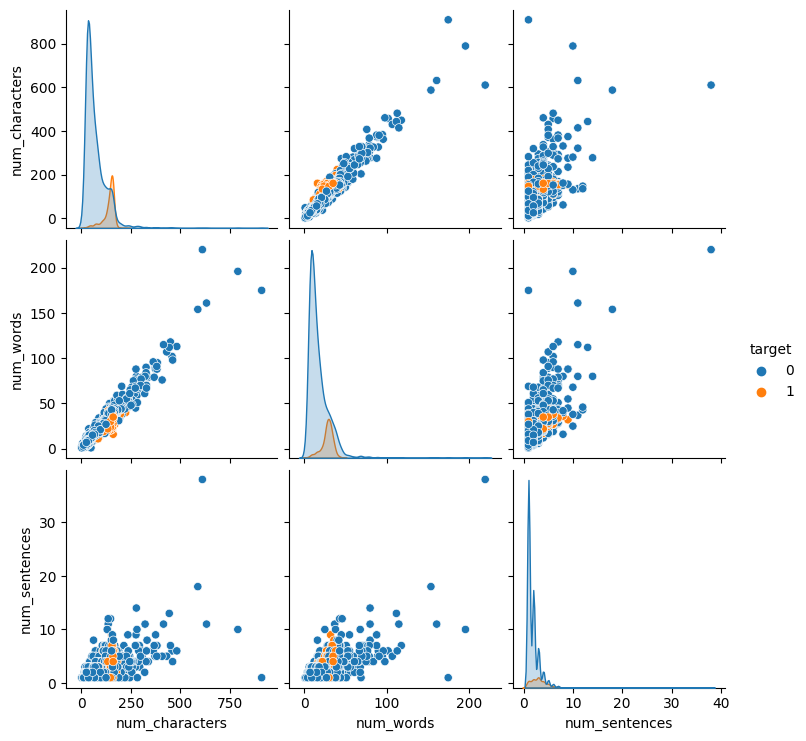

In [46]:
#pairwise scatterplot
sns.pairplot(df,hue='target')

In [47]:
#Finding out the pearsonian correlation coefficient between target variable and no of characters,words and sentences
df[['target','num_characters','num_words','num_sentences']].corr(method="pearson")

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

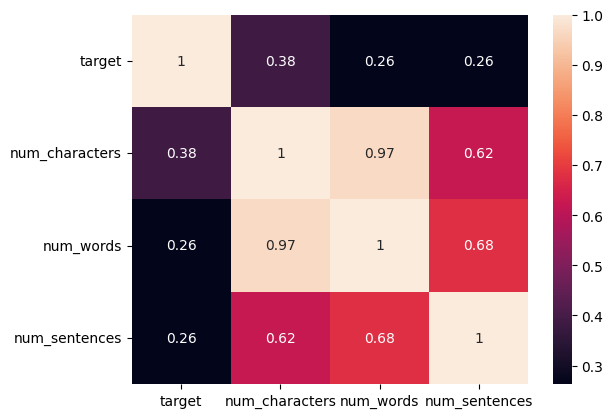

In [48]:
#Heat map for correlation
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(method="pearson"),annot=True)

### We can see that spam sms has high correlation with number of characters(correlation coefficient=0.97)

# Text Preprocessing
* 1.Lowercase
* 2.Tokenization
* 3.Removing Special Characters
* 4.Removing stopwords and punctuation
* 5.Stemming

In [49]:


from nltk.stem import PorterStemmer

def preprocess_text(text):
    # Convert the text to lowercase.
    text = text.lower()

    # Remove special characters.
    text = re.sub('[^\w\s]', '', text)

    # Remove punctuation.
    text = re.sub('[,.!?;:]', '', text)

    # Tokenize the text into words.
    words = nltk.word_tokenize(text)

    # Remove stopwords.
    stopwords = nltk.corpus.stopwords.words('english')
    filtered_words = [word for word in words if word not in stopwords]

    # Stem the words.
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in filtered_words]

    return " ".join(stemmed_words)

# Test the function.
text = "This is a test sentence. @#$%^&*() with some punctuation and stopwords."

stemmed_words = preprocess_text(text)

print(stemmed_words)


test sentenc punctuat stopword


In [50]:
df['text'].apply(preprocess_text)
df["transformed_text"]=df['text'].apply(preprocess_text)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [52]:
wordcloud = WordCloud(width=500, height=500, background_color="white")
wc=wordcloud.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

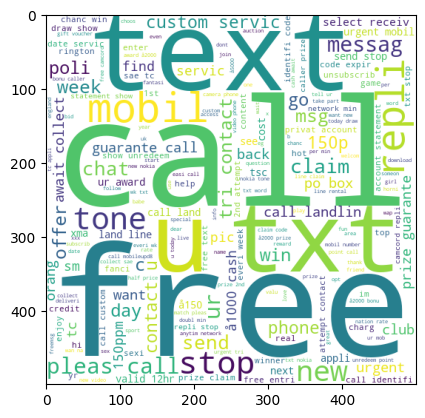

In [53]:
#Wordcloud for spam sms
plt.imshow(wc)

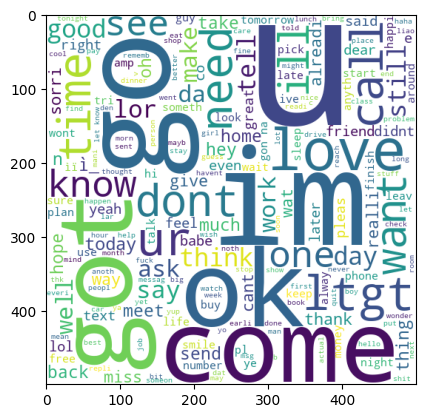

In [54]:
#Wordcloud for ham sms
wc_ham=wordcloud.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(wc_ham)

In [55]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
#Printing the no of times a word has appeared in ham sms
count_ham=pd.DataFrame(Counter(ham_corpus).most_common(50))
count_ham.columns=["words","frequency"]
print(count_ham)

    words  frequency
0       u        878
1      im        435
2      go        401
3     get        352
4       2        288
5    come        272
6    ltgt        254
7      ok        246
8    dont        242
9     got        237
10   like        232
11   know        232
12   call        232
13   time        211
14   love        211
15   want        208
16    ill        206
17   good        206
18     ur        197
19    day        192
20   need        171
21    one        163
22      4        160
23    lor        157
24   home        151
25  think        150
26    see        146
27  still        141
28   take        137
29   tell        133
30   make        129
31    say        127
32   back        126
33     da        125
34   well        124
35  today        121
36    ask        121
37   send        120
38      r        120
39  sorri        119
40      n        118
41     ì_        117
42   work        117
43   hope        116
44     hi        112
45   meet        110
46     oh    

In [58]:
#Printing the no of times a word has appeared in spam sms
count_spam=pd.DataFrame(Counter(spam_corpus).most_common(50))
count_spam.columns=["word","frequency"]
print(count_spam)

        word  frequency
0       call        321
1       free        188
2          2        155
3        txt        137
4          u        123
5       text        121
6         ur        119
7      mobil        114
8       stop        103
9      repli        100
10     claim         98
11         4         97
12     prize         82
13       get         73
14       new         64
15    servic         64
16      tone         62
17      send         59
18    urgent         58
19     nokia         57
20   contact         56
21     award         55
22     phone         52
23      cash         51
24      week         49
25     pleas         49
26       win         48
27        tc         44
28   collect         44
29       min         44
30    custom         42
31  guarante         42
32    messag         41
33       per         41
34        18         38
35        16         37
36      chat         37
37       tri         36
38    number         35
39      draw         34
40      show    

[Text(0, 0, 'call'),
 Text(1, 0, 'free'),
 Text(2, 0, '2'),
 Text(3, 0, 'txt'),
 Text(4, 0, 'u'),
 Text(5, 0, 'text'),
 Text(6, 0, 'ur'),
 Text(7, 0, 'mobil'),
 Text(8, 0, 'stop'),
 Text(9, 0, 'repli'),
 Text(10, 0, 'claim'),
 Text(11, 0, '4'),
 Text(12, 0, 'prize'),
 Text(13, 0, 'get'),
 Text(14, 0, 'new'),
 Text(15, 0, 'servic'),
 Text(16, 0, 'tone'),
 Text(17, 0, 'send'),
 Text(18, 0, 'urgent'),
 Text(19, 0, 'nokia'),
 Text(20, 0, 'contact'),
 Text(21, 0, 'award'),
 Text(22, 0, 'phone'),
 Text(23, 0, 'cash'),
 Text(24, 0, 'week'),
 Text(25, 0, 'pleas'),
 Text(26, 0, 'win'),
 Text(27, 0, 'tc'),
 Text(28, 0, 'collect'),
 Text(29, 0, 'min'),
 Text(30, 0, 'custom'),
 Text(31, 0, 'guarante'),
 Text(32, 0, 'messag'),
 Text(33, 0, 'per'),
 Text(34, 0, '18'),
 Text(35, 0, '16'),
 Text(36, 0, 'chat'),
 Text(37, 0, 'tri'),
 Text(38, 0, 'number'),
 Text(39, 0, 'draw'),
 Text(40, 0, 'show'),
 Text(41, 0, 'go'),
 Text(42, 0, 'line'),
 Text(43, 0, 'msg'),
 Text(44, 0, 'receiv'),
 Text(45, 0, 'tod

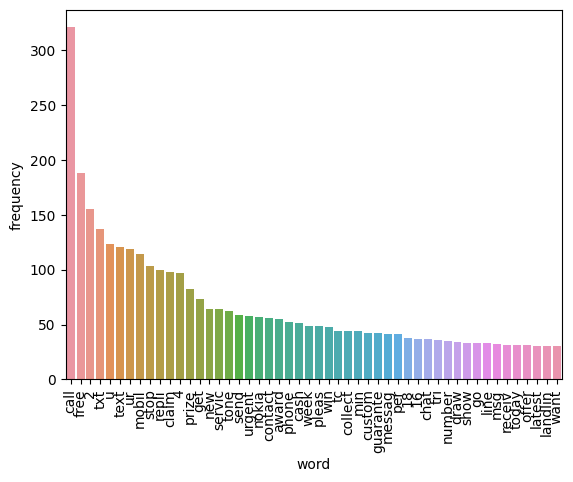

In [59]:
ax=sns.barplot(x="word",y="frequency",data=count_spam)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'u'),
 Text(1, 0, 'im'),
 Text(2, 0, 'go'),
 Text(3, 0, 'get'),
 Text(4, 0, '2'),
 Text(5, 0, 'come'),
 Text(6, 0, 'ltgt'),
 Text(7, 0, 'ok'),
 Text(8, 0, 'dont'),
 Text(9, 0, 'got'),
 Text(10, 0, 'like'),
 Text(11, 0, 'know'),
 Text(12, 0, 'call'),
 Text(13, 0, 'time'),
 Text(14, 0, 'love'),
 Text(15, 0, 'want'),
 Text(16, 0, 'ill'),
 Text(17, 0, 'good'),
 Text(18, 0, 'ur'),
 Text(19, 0, 'day'),
 Text(20, 0, 'need'),
 Text(21, 0, 'one'),
 Text(22, 0, '4'),
 Text(23, 0, 'lor'),
 Text(24, 0, 'home'),
 Text(25, 0, 'think'),
 Text(26, 0, 'see'),
 Text(27, 0, 'still'),
 Text(28, 0, 'take'),
 Text(29, 0, 'tell'),
 Text(30, 0, 'make'),
 Text(31, 0, 'say'),
 Text(32, 0, 'back'),
 Text(33, 0, 'da'),
 Text(34, 0, 'well'),
 Text(35, 0, 'today'),
 Text(36, 0, 'ask'),
 Text(37, 0, 'send'),
 Text(38, 0, 'r'),
 Text(39, 0, 'sorri'),
 Text(40, 0, 'n'),
 Text(41, 0, 'ì_'),
 Text(42, 0, 'work'),
 Text(43, 0, 'hope'),
 Text(44, 0, 'hi'),
 Text(45, 0, 'meet'),
 Text(46, 0, 'oh'),
 Text(47, 0,

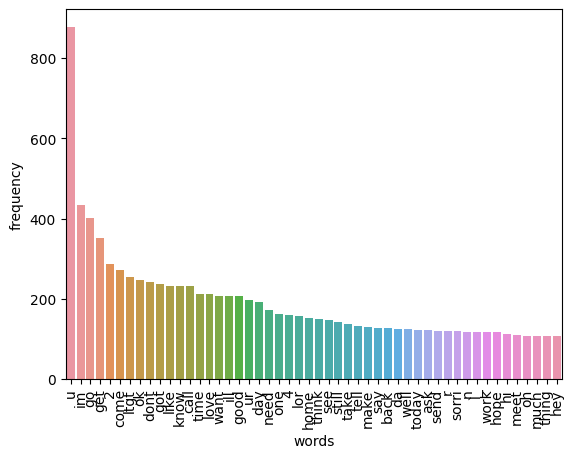

In [60]:
ax=sns.barplot(x="words",y="frequency",data=count_ham)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Model Building

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()


In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [63]:
X = vectorization.fit_transform(df['transformed_text']).toarray()

In [64]:
X.shape
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
y = df['target']

In [66]:
X.shape,y.shape

((5169, 8065), (5169,))

## Random Over Sampling to deal with imbalance in target feature

In [67]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2529)

In [68]:
X_ros,y_ros=ros.fit_resample(X,y)

In [69]:
X_ros.shape,y_ros.shape,X.shape,y.shape


((9032, 8065), (9032,), (5169, 8065), (5169,))

In [70]:
y_ros.value_counts()

target
0    4516
1    4516
Name: count, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=2529)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1, digits=4))

[[763 123]
 [  0 921]]
              precision    recall  f1-score   support

           0     1.0000    0.8612    0.9254       886
           1     0.8822    1.0000    0.9374       921

    accuracy                         0.9319      1807
   macro avg     0.9411    0.9306    0.9314      1807
weighted avg     0.9400    0.9319    0.9315      1807



In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2, digits=4))

[[868  18]
 [  8 913]]
              precision    recall  f1-score   support

           0     0.9909    0.9797    0.9852       886
           1     0.9807    0.9913    0.9860       921

    accuracy                         0.9856      1807
   macro avg     0.9858    0.9855    0.9856      1807
weighted avg     0.9857    0.9856    0.9856      1807



In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3, digits=4))

[[885   1]
 [ 24 897]]
              precision    recall  f1-score   support

           0     0.9736    0.9989    0.9861       886
           1     0.9989    0.9739    0.9863       921

    accuracy                         0.9862      1807
   macro avg     0.9862    0.9864    0.9862      1807
weighted avg     0.9865    0.9862    0.9862      1807



In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [79]:
classifiers= {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.991698948533481, 0.9923913043478261)

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.991698948533481
Precision -  0.9923913043478261
For  KN
Accuracy -  0.9767570558937465
Precision -  1.0
For  NB
Accuracy -  0.9856115107913669
Precision -  0.9806659505907627
For  DT
Accuracy -  0.8749308245711124
Precision -  0.9371069182389937
For  LR
Accuracy -  0.96956281128943
Precision -  0.9758241758241758
For  RF
Accuracy -  0.9961261759822911
Precision -  0.9967391304347826


In [83]:
performance = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [84]:
performance

,Algorithm,Accuracy,Precision
1,KN,0.976757,1.000000
5,RF,0.996126,0.996739
0,SVC,0.991699,0.992391
2,NB,0.985612,0.980666
4,LR,0.969563,0.975824
3,DT,0.874931,0.937107


In [85]:
def output_lable(n):
    if n == 0:
        return "Not Spam !!!"
    elif n == 1:
        return "Spam !!!"
    
def manual_testing(message):
    testing_message = {"text":[message]}
    new_def_test = pd.DataFrame(testing_message)
    new_def_test["text"] = new_def_test["text"].apply(preprocess_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_KN = knc.predict(new_xv_test)
    pred_NB = mnb.predict(new_xv_test)
    pred_RF = rfc.predict(new_xv_test)
    pred_LR = lrc.predict(new_xv_test)
    pred_DT = dtc.predict(new_xv_test)

    return print("\n\nKN Prediction: {} \nNB Prediction : {} \nRF Prediction : {} \nLR Prediction : {} \nDT Prediction : {}"
                                                                                                        .format(output_lable(pred_KN[0]),
                                                                                                                output_lable(pred_NB[0]),
                                                                                                                output_lable(pred_RF[0]),
                                                                                                                output_lable(pred_LR[0]),
                                                                                                                output_lable(pred_DT[0])))


Input:07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow			


In [86]:

sms = str(input())
manual_testing(sms)



KN Prediction: Spam !!! 
NB Prediction : Spam !!! 
RF Prediction : Spam !!! 
LR Prediction : Spam !!! 
DT Prediction : Spam !!!


Input:I have recived you mail i will call you later.

In [87]:
sms = str(input())
manual_testing(sms)



KN Prediction: Not Spam !!! 
NB Prediction : Not Spam !!! 
RF Prediction : Not Spam !!! 
LR Prediction : Not Spam !!! 
DT Prediction : Not Spam !!!


Input:You have an overdue tax refund of $1,000 waiting to be claimed! Click the link below to get started now:

In [88]:
sms=str(input())
manual_testing(sms)



KN Prediction: Not Spam !!! 
NB Prediction : Spam !!! 
RF Prediction : Spam !!! 
LR Prediction : Spam !!! 
DT Prediction : Not Spam !!!
